---

## 🌐 Phase 1: Web Scraping

### 1.1 Baseball Reference Scraper (`baseball_scraper.py`)

**Source:** [Baseball Reference](https://www.baseball-reference.com)

**Technology Stack:**
- **Selenium WebDriver** - For browser automation (handles JavaScript-rendered content)
- **BeautifulSoup** - For HTML parsing
- **pandas** - For DataFrame creation and CSV export
- **webdriver-manager** - Automatic ChromeDriver management

**Key Features:**
- Headless browser mode for faster scraping
- Handles hidden tables (Baseball Reference stores some tables in HTML comments)
- Timeout management to prevent hanging on slow pages
- Anti-detection measures (custom user agent, disabled automation flags)

**Data Collected:**

| File | Description | Key Statistics |
|------|-------------|----------------|
| `Batting_YEAR.csv` | Team batting stats | BA, OBP, SLG, OPS, HR, RBI, R, etc. |
| `Pitching_YEAR.csv` | Team pitching stats | ERA, WHIP, SO, BB, W-L%, etc. |
| `Fielding_YEAR.csv` | Team fielding stats | Fld%, E, DP, DefEff, etc. |
| `Postseason_YEAR.csv` | Playoff results | Series winners/losers, scores |
| `WAA_Positions_YEAR.csv` | Wins Above Average by position | Position-specific WAA rankings |

### 1.2 Salary Scraper (`salary_scraper.py`)

**Source:** [SteveTheUmp.com](https://www.stevetheump.com/Payrolls.htm)

**Purpose:** Scrape historical team payroll data to analyze the relationship between team spending and performance.

**Key Features:**
- Parses multiple tables from a single page (one per year)
- Uses regex to identify year sections from headers
- Extracts team names and payroll amounts

**Data Collected:**

| File | Description | Key Statistics |
|------|-------------|----------------|
| `Salaries_YEAR.csv` | Team payroll data | Team name, Total payroll ($) |

---

## 🧹 Phase 2: Data Cleaning

### 2.1 Team Name Standardization (`data_cleaning.py`)

**Problem:** Team names and abbreviations vary across years and data sources due to:
- Team relocations (Montreal Expos → Washington Nationals)
- Team renamings (Cleveland Indians → Cleveland Guardians)
- Inconsistent abbreviations (CWS vs CHW for White Sox)

**Solution:** All team names are standardized to **2025 conventions**.

#### Historical Name Changes Handled:

| Old Name | New Name (2025 Standard) | Year Changed |
|----------|--------------------------|---------------|
| Montreal Expos | Washington Nationals | 2005 |
| Florida Marlins | Miami Marlins | 2012 |
| Cleveland Indians | Cleveland Guardians | 2022 |
| Oakland Athletics | Athletics | 2024 |
| Tampa Bay Devil Rays | Tampa Bay Rays | 2008 |
| Anaheim Angels | Los Angeles Angels | Various |
| California Angels | Los Angeles Angels | Various |

#### Abbreviation Mappings:

| Old Abbreviation | New (2025 Standard) |
|------------------|---------------------|
| OAK | ATH |
| CWS | CHW |
| FLA | MIA |
| MON | WSN |
| ANA/CAL | LAA |
| TBD | TBR |

### 2.2 Salary Data Cleaning (`salary_cleaning.py`)

**Tasks Performed:**
1. **Identify correct payroll column** - Some source tables have multiple numeric columns
2. **Remove aggregate rows** - Filter out average/median salary rows
3. **Clean currency formatting** - Remove `$`, commas, and `M` suffixes
4. **Standardize team names** - Apply same mappings as main data cleaning

**Before Cleaning:**
```
Oakland Athletics, $45,500,000
```

**After Cleaning:**
```
Athletics, 45500000
```

---

## 📊 Data Overview

Let's examine the structure and sample data from each file type.

In [1]:
import pandas as pd
import os
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Base data path
DATA_PATH = Path('Data')

# Example year to display
SAMPLE_YEAR = 2025

### Batting Statistics

In [2]:
batting = pd.read_csv(DATA_PATH / str(SAMPLE_YEAR) / f'Batting_{SAMPLE_YEAR}.csv')
batting.head()

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Arizona Diamondbacks,65,27.8,4.88,162,6210,5480,791,1377,277,38,214,768,121,39,545,1316,0.251,0.325,0.433,0.757,108,2372,109,81,37,64,21,1112
1,Athletics,58,26.1,4.52,162,6151,5547,733,1403,296,16,219,709,80,28,502,1406,0.253,0.318,0.431,0.749,106,2388,117,44,18,35,14,1106
2,Atlanta Braves,71,28.3,4.47,162,6186,5508,724,1349,243,19,190,701,82,25,575,1371,0.245,0.320,0.399,0.720,102,2200,98,51,15,36,14,1160
3,Baltimore Orioles,70,26.5,4.18,162,6020,5416,677,1273,251,19,191,643,121,37,484,1457,0.235,0.305,0.394,0.699,96,2135,102,75,4,41,14,1044
4,Boston Red Sox,56,27.6,4.85,162,6206,5562,786,1414,324,24,186,748,139,38,518,1419,0.254,0.324,0.421,0.745,106,2344,99,72,13,41,24,1125


### Pitching Statistics

In [3]:
pitching = pd.read_csv(DATA_PATH / str(SAMPLE_YEAR) / f'Pitching_{SAMPLE_YEAR}.csv')
pitching.head()

,Tm,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,GF,CG,tSho,cSho,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB
0,Arizona Diamondbacks,42,29.8,4.85,80,82,0.494,4.49,162,162,162,0,9,0,42,1444.0,1403,785,721,196,500,20,1288,57,8,31,6183,97,4.27,1.318,8.7,1.2,3.1,8.0,2.58,1093
1,Athletics,35,28.6,5.04,76,86,0.469,4.70,162,162,162,0,11,0,35,1437.2,1387,817,750,222,570,26,1323,80,7,29,6232,89,4.66,1.361,8.7,1.4,3.6,8.3,2.32,1120
2,Atlanta Braves,46,29.4,4.53,76,86,0.469,4.36,162,162,161,1,8,0,34,1438.0,1348,734,696,197,530,20,1416,70,8,40,6116,96,4.20,1.306,8.4,1.2,3.3,8.9,2.67,1088
3,Baltimore Orioles,41,30.6,4.86,75,87,0.463,4.60,162,162,161,1,7,0,38,1432.2,1433,788,733,217,523,19,1351,48,8,63,6166,88,4.41,1.365,9.0,1.4,3.3,8.5,2.58,1098
4,Boston Red Sox,35,29.4,4.17,89,73,0.549,3.70,162,162,160,2,11,1,45,1448.1,1333,676,596,164,530,17,1361,73,5,53,6150,111,3.98,1.286,8.3,1.0,3.3,8.5,2.57,1156


### Fielding Statistics

In [4]:
fielding = pd.read_csv(DATA_PATH / str(SAMPLE_YEAR) / f'Fielding_{SAMPLE_YEAR}.csv')
fielding.head()

,Tm,#Fld,RA/G,DefEff,G,GS,CG,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Rdrs,Rdrs/yr,Rgood
0,Arizona Diamondbacks,65,4.85,0.695,162,1458,1154,12996.0,5853,4332,1437,84,125,0.986,35,3,-9,0,4
1,Athletics,58,5.04,0.698,162,1458,1095,12939.0,5613,4313,1212,88,109,0.984,-25,-2,1,-3,-2
2,Atlanta Braves,70,4.53,0.698,162,1458,1163,12942.0,5735,4314,1367,54,109,0.991,18,2,-3,3,10
3,Baltimore Orioles,69,4.86,0.684,162,1458,1109,12894.0,5789,4298,1403,88,121,0.985,-35,-3,2,0,-5
4,Boston Red Sox,55,4.17,0.691,162,1458,1085,13035.0,5922,4345,1461,116,131,0.980,36,3,-15,0,-4


### Salary Data

In [5]:
salaries = pd.read_csv(DATA_PATH / str(SAMPLE_YEAR) / f'Salaries_{SAMPLE_YEAR}.csv')
salaries.head()

,Tm,Payroll
0,Los Angeles Dodgers,321000000
1,New York Mets,315000000
2,Philadelphia Phillies,278000000
3,New York Yankees,272000000
4,Toronto Blue Jays,233000000


### Postseason Results

In [6]:
postseason = pd.read_csv(DATA_PATH / str(SAMPLE_YEAR) / f'Postseason_{SAMPLE_YEAR}.csv')
postseason

,0,1,2
0,World Series,4-3,Los Angeles Dodgers over Toronto Blue Jays
1,ALCS,4-3,Toronto Blue Jays over Seattle Mariners
2,NLCS,4-0,Los Angeles Dodgers over Milwaukee Brewers
3,AL Division Series,3-1,Toronto Blue Jays over New York Yankees
4,AL Division Series,3-2,Seattle Mariners over Detroit Tigers
5,NL Division Series,3-2,Milwaukee Brewers over Chicago Cubs
6,NL Division Series,3-1,Los Angeles Dodgers over Philadelphia Phillies
7,Wild Card Series,2-1,Detroit Tigers over Cleveland Guardians
8,Wild Card Series,2-1,New York Yankees over Boston Red Sox
9,Wild Card Series,2-0,Los Angeles Dodgers over Cincinnati Reds


### WAA by Position

In [7]:
waa = pd.read_csv(DATA_PATH / str(SAMPLE_YEAR) / f'WAA_Positions_{SAMPLE_YEAR}.csv')
waa.head()

,Rk,Total,All P,SP,RP,Non-P,C,1B,2B,3B,SS,LF,CF,RF,OF (All),DH,PH
0,1,Philadelphia Phillies18.5,PHI14.8,PHI14.8,SDP7.1,CHC19.8,SEA3.4,ATH4.0,CHC3.7,CLE2.8,KCR5.1,BOS2.4,SEA4.3,NYY5.6,NYY8.2,LAD4.3,TOR0.7
1,2,New York Yankees13.7,CIN13.4,CIN12.0,HOU3.0,LAD12.3,CHC2.6,ATL3.8,MIL3.3,SFG2.4,TEX4.8,TEX2.4,CHC3.7,NYM4.0,BOS7.5,NYY3.4,BOS0.5
2,3,Chicago Cubs13.4,SDP10.8,PIT6.2,PIT2.0,NYY11.7,ATL2.2,CHC1.9,ARI1.7,KCR2.3,ARI4.8,CHC1.8,TOR2.8,SDP3.5,CHC7.5,PHI2.2,LAD0.3
3,4,Milwaukee Brewers13.4,PIT8.3,NYY5.8,CIN1.4,TOR10.7,LAD2.0,TOR1.9,NYY1.5,TBR2.3,PHI3.8,SEA1.7,MIN2.7,ARI3.1,TEX5.5,BOS1.6,CHC0.0
4,5,Boston Red Sox11.9,HOU7.9,MIL5.2,MIL1.1,NYM10.5,MIL1.8,TBR1.7,TEX1.1,ARI2.0,HOU3.7,CLE1.2,BOS2.5,BOS2.6,SEA4.6,SEA1.4,NYM0.0


---

## 🧹 Phase 3: Data Cleaning & Standardization

Now we'll clean and standardize all the data to prepare for analysis.

### 3.1 Team Name Standardization Mappings

First, let's define our standardization mappings to ensure all team names are consistent across all years (using 2025 conventions).

In [9]:
TEAM_NAME_MAPPINGS = {
    "Oakland Athletics": "Athletics", "Oakland A's": "Athletics",
    "Cleveland Indians": "Cleveland Guardians",
    "Florida Marlins": "Miami Marlins",
    "Montreal Expos": "Washington Nationals",
    "Tampa Bay Devil Rays": "Tampa Bay Rays",
    "Anaheim Angels": "Los Angeles Angels", "California Angels": "Los Angeles Angels",
    "Los Angeles Angels of Anaheim": "Los Angeles Angels",
}

ABBREVIATION_MAPPINGS = {
    "OAK": "ATH", "CWS": "CHW", "FLA": "MIA", "MON": "WSN",
    "ANA": "LAA", "CAL": "LAA", "TBD": "TBR", "WAS": "WSN", "WSH": "WSN",
}

def standardize_team_name(name):
    if pd.isna(name):
        return name
    name = str(name).strip()
    return TEAM_NAME_MAPPINGS.get(name, name)

def standardize_abbreviation(abbr):
    if pd.isna(abbr):
        return abbr
    abbr = str(abbr).strip().upper()
    return ABBREVIATION_MAPPINGS.get(abbr, abbr)

### 3.2 Parse Postseason Results

Parse all postseason files to extract team wins, losses, and win percentages for each year.

In [10]:
import re

def parse_postseason_file(filepath, year):
    try:
        df = pd.read_csv(filepath, header=None, names=['Series', 'Score', 'Result'])
    except:
        return None
    
    team_stats = {}
    
    for _, row in df.iterrows():
        try:
            score = str(row['Score'])
            score_match = re.match(r'(\d+)-(\d+)', score)
            if not score_match:
                continue
            winner_wins = int(score_match.group(1))
            loser_wins = int(score_match.group(2))
            
            result = str(row['Result'])
            if ' over ' not in result:
                continue
            parts = result.split(' over ')
            winner = standardize_team_name(parts[0].strip())
            loser = standardize_team_name(parts[1].strip())
            
            if winner not in team_stats:
                team_stats[winner] = {'Wins': 0, 'Losses': 0}
            team_stats[winner]['Wins'] += winner_wins
            team_stats[winner]['Losses'] += loser_wins
            
            if loser not in team_stats:
                team_stats[loser] = {'Wins': 0, 'Losses': 0}
            team_stats[loser]['Wins'] += loser_wins
            team_stats[loser]['Losses'] += winner_wins
        except:
            continue
    
    if not team_stats:
        return None
    
    records = []
    for team, stats in team_stats.items():
        total_games = stats['Wins'] + stats['Losses']
        win_pct = stats['Wins'] / total_games if total_games > 0 else 0
        records.append({'Team': team, 'Wins': stats['Wins'], 'Losses': stats['Losses'], 'Win%': round(win_pct, 3)})
    
    result_df = pd.DataFrame(records)
    result_df = result_df.sort_values('Wins', ascending=False).reset_index(drop=True)
    result_df['Year'] = year
    return result_df

In [11]:
all_postseason_stats = []
years = range(1998, 2026)

for year in years:
    filepath = DATA_PATH / str(year) / f'Postseason_{year}.csv'
    if filepath.exists():
        year_df = parse_postseason_file(filepath, year)
        if year_df is not None:
            all_postseason_stats.append(year_df)

postseason_all_years = pd.concat(all_postseason_stats, ignore_index=True)

**Postseason Data Loaded:** 28 years (1998-2025) of playoff results parsed and combined.

### 3.3 Clean and Standardize All Data Files

Now let's create a comprehensive cleaning loop that standardizes team names across ALL data files (Batting, Pitching, Fielding, Salaries, WAA).

In [12]:
def clean_dataframe(df, file_type):
    df_clean = df.copy()
    team_columns = ['Tm', 'Team', 'team', 'Name']
    
    for col in df_clean.columns:
        if col in team_columns:
            df_clean[col] = df_clean[col].apply(standardize_team_name)
    
    if file_type == 'WAA_Positions' and len(df_clean.columns) > 0:
        for col in df_clean.columns:
            if df_clean[col].dtype == object:
                df_clean[col] = df_clean[col].apply(lambda x: standardize_embedded_team(x) if pd.notna(x) else x)
    
    return df_clean

def standardize_embedded_team(value):
    value_str = str(value)
    for old_name, new_name in TEAM_NAME_MAPPINGS.items():
        if old_name in value_str:
            value_str = value_str.replace(old_name, new_name)
    for old_abbr, new_abbr in ABBREVIATION_MAPPINGS.items():
        pattern = r'\b' + old_abbr + r'(?=[\d\.\-]|$)'
        value_str = re.sub(pattern, new_abbr, value_str)
    return value_str

In [13]:
file_types = ['Batting', 'Pitching', 'Fielding', 'Salaries']
years = range(1998, 2026)
cleaned_data = {ft: [] for ft in file_types}

for year in years:
    year_path = DATA_PATH / str(year)
    if not year_path.exists():
        continue
    
    for file_type in file_types:
        filepath = year_path / f'{file_type}_{year}.csv'
        if filepath.exists():
            try:
                df = pd.read_csv(filepath)
                df_clean = clean_dataframe(df, file_type)
                df_clean['Year'] = year
                cleaned_data[file_type].append(df_clean)
            except:
                pass

In [14]:
batting_all = pd.concat(cleaned_data['Batting'], ignore_index=True)
pitching_all = pd.concat(cleaned_data['Pitching'], ignore_index=True)
fielding_all = pd.concat(cleaned_data['Fielding'], ignore_index=True)
salaries_all = pd.concat(cleaned_data['Salaries'], ignore_index=True)

batting_all = batting_all[batting_all['Tm'].notna() & (batting_all['Tm'] != '')]
pitching_all = pitching_all[pitching_all['Tm'].notna() & (pitching_all['Tm'] != '')]
fielding_all = fielding_all[fielding_all['Tm'].notna() & (fielding_all['Tm'] != '')]
salaries_all = salaries_all[salaries_all['Tm'].notna() & (salaries_all['Tm'] != '')]

**Master DataFrames Created:**
- Batting: 840 team-years × 30 columns
- Pitching: 840 team-years × 36 columns  
- Fielding: 840 team-years × 20 columns
- Salaries: 840 team-years × 3 columns
- Postseason: 280 playoff team appearances

### 3.4 Verify Team Name Standardization

Let's verify that all team names are now consistent across the datasets.

In [15]:
datasets = {
    'Batting': batting_all['Tm'].unique(),
    'Pitching': pitching_all['Tm'].unique(),
    'Fielding': fielding_all['Tm'].unique(),
    'Salaries': salaries_all['Tm'].unique(),
    'Postseason': postseason_all_years['Team'].unique()
}

all_teams = set()
for teams in datasets.values():
    all_teams.update(teams)

**Team Standardization Complete:** 30 unique MLB teams identified across all datasets. Historical team names (Oakland Athletics → Athletics, Cleveland Indians → Cleveland Guardians, etc.) have been standardized to 2025 naming conventions.

### 3.5 Filter to Playoff Teams Only

Now we filter all the data to only include teams that made the playoffs in each year. This allows us to analyze only the teams that matter for our correlation analysis.

In [16]:
def filter_to_playoff_teams(stats_df, postseason_df, team_col='Tm', year_col='Year'):
    playoff_team_years = set(zip(postseason_df['Team'], postseason_df['Year']))
    mask = stats_df.apply(lambda row: (row[team_col], row[year_col]) in playoff_team_years, axis=1)
    return stats_df[mask].copy()

In [17]:
batting_playoff = filter_to_playoff_teams(batting_all, postseason_all_years)
pitching_playoff = filter_to_playoff_teams(pitching_all, postseason_all_years)
fielding_playoff = filter_to_playoff_teams(fielding_all, postseason_all_years)
salaries_playoff = filter_to_playoff_teams(salaries_all, postseason_all_years)

---

## 📊 Phase 4: Ranking Statistics

Now we'll rank each team for every statistic per year. 

**Ranking System:**
- Rank 1 = Highest value for that statistic
- Rank 30 = Lowest value for that statistic
- The rank IS the point value (1 point for highest, 30 points for lowest)

This keeps statistics separate (Batting SO ≠ Pitching SO) and allows us to track who had the most/least of each stat regardless of whether it's traditionally "good" or "bad".

In [18]:
def rank_stats_by_year(df, stat_columns, team_col='Tm', year_col='Year'):
    rankings = []
    
    for year in df[year_col].unique():
        year_data = df[df[year_col] == year].copy()
        year_rankings = {team_col: year_data[team_col].values, year_col: year}
        
        for stat in stat_columns:
            if stat in year_data.columns:
                values = pd.to_numeric(year_data[stat], errors='coerce')
                year_rankings[f'{stat}_Rank'] = values.rank(ascending=False, method='min').astype('Int64').values
        
        year_df = pd.DataFrame(year_rankings)
        rankings.append(year_df)
    
    return pd.concat(rankings, ignore_index=True)

### 4.1 Batting Statistics Rankings

In [19]:
batting_exclude = ['Tm', 'Year', '#Bat', 'BatAge']
batting_stat_cols = [col for col in batting_playoff.columns if col not in batting_exclude]
batting_rankings = rank_stats_by_year(batting_playoff, batting_stat_cols)

In [20]:
batting_2025 = batting_rankings[batting_rankings['Year'] == 2025]
display_cols = ['Tm', 'Year', 'R_Rank', 'H_Rank', 'HR_Rank', 'RBI_Rank', 'BA_Rank', 'OPS_Rank']
available_display = [c for c in display_cols if c in batting_2025.columns]
batting_2025[available_display].sort_values('HR_Rank')

,Tm,Year,R_Rank,H_Rank,HR_Rank,RBI_Rank,BA_Rank,OPS_Rank
261,New York Yankees,2025,1,6,1,1,7,1
259,Los Angeles Dodgers,2025,2,5,2,2,5,2
264,Seattle Mariners,2025,8,10,3,8,11,7
255,Chicago Cubs,2025,5,6,4,3,8,5
262,Philadelphia Phillies,2025,7,2,5,5,2,4
258,Detroit Tigers,2025,9,9,6,9,9,9
265,Toronto Blue Jays,2025,4,1,7,3,1,3
254,Boston Red Sox,2025,6,4,8,7,4,6
257,Cleveland Guardians,2025,12,12,9,12,12,12
256,Cincinnati Reds,2025,10,11,10,10,10,11


### 4.2 Pitching Statistics Rankings

In [21]:
pitching_exclude = ['Tm', 'Year', '#P', 'PAge']
pitching_stat_cols = [col for col in pitching_playoff.columns if col not in pitching_exclude]
pitching_rankings = rank_stats_by_year(pitching_playoff, pitching_stat_cols)

In [22]:
pitching_2025 = pitching_rankings[pitching_rankings['Year'] == 2025]
display_cols = ['Tm', 'Year', 'W_Rank', 'ERA_Rank', 'SO_Rank', 'WHIP_Rank', 'SV_Rank']
available_display = [c for c in display_cols if c in pitching_2025.columns]
pitching_2025[available_display].sort_values('ERA_Rank')

,Tm,Year,W_Rank,ERA_Rank,SO_Rank,WHIP_Rank,SV_Rank
265,Toronto Blue Jays,2025,3,1,5,2,10
259,Los Angeles Dodgers,2025,5,2,1,4,4
258,Detroit Tigers,2025,11,2,10,5,12
261,New York Yankees,2025,3,4,3,6,8
264,Seattle Mariners,2025,7,5,6,10,8
256,Cincinnati Reds,2025,12,6,9,9,11
255,Chicago Cubs,2025,6,7,12,12,7
262,Philadelphia Phillies,2025,2,7,2,7,2
254,Boston Red Sox,2025,9,9,11,1,5
257,Cleveland Guardians,2025,10,9,8,3,2


### 4.3 Fielding Statistics Rankings

In [23]:
fielding_exclude = ['Tm', 'Year', '#Fld']
fielding_stat_cols = [col for col in fielding_playoff.columns if col not in fielding_exclude]
fielding_rankings = rank_stats_by_year(fielding_playoff, fielding_stat_cols)

In [24]:
fielding_2025 = fielding_rankings[fielding_rankings['Year'] == 2025]
display_cols = ['Tm', 'Year', 'Fld%_Rank', 'E_Rank', 'DP_Rank', 'DefEff_Rank']
available_display = [c for c in display_cols if c in fielding_2025.columns]
fielding_2025[available_display].sort_values('Fld%_Rank')

,Tm,Year,Fld%_Rank,E_Rank,DP_Rank,DefEff_Rank
255,Chicago Cubs,2025,1,12,7,1
262,Philadelphia Phillies,2025,1,11,9,11
264,Seattle Mariners,2025,3,9,5,7
259,Los Angeles Dodgers,2025,3,10,11,6
260,Milwaukee Brewers,2025,5,7,3,4
263,San Diego Padres,2025,5,8,7,2
258,Detroit Tigers,2025,7,6,2,8
256,Cincinnati Reds,2025,8,4,12,3
265,Toronto Blue Jays,2025,8,5,5,9
261,New York Yankees,2025,10,3,9,5


### 4.4 Salary Rankings

In [25]:
salary_exclude = ['Tm', 'Year']
salary_stat_cols = [col for col in salaries_playoff.columns if col not in salary_exclude]
salary_rankings = rank_stats_by_year(salaries_playoff, salary_stat_cols)

In [26]:
salary_2025 = salary_rankings[salary_rankings['Year'] == 2025]
salary_2025.sort_values('Payroll_Rank')

,Tm,Year,Payroll_Rank
254,Los Angeles Dodgers,2025,1
255,Philadelphia Phillies,2025,2
256,New York Yankees,2025,3
257,Toronto Blue Jays,2025,4
258,San Diego Padres,2025,5
259,Boston Red Sox,2025,6
260,Chicago Cubs,2025,6
261,Seattle Mariners,2025,8
262,Detroit Tigers,2025,9
263,Cincinnati Reds,2025,10


### 4.5 Rankings Summary

All ranking tables are now created and kept **separate** by category:

---

## ✅ Data Ready for Analysis

**Separate Ranking Tables Created:**

| Table | Category | Stats Ranked | Purpose |
|-------|----------|--------------|---------|
| `batting_rankings` | Batting | R, H, HR, RBI, BA, OBP, SLG, OPS, SO, etc. | Team offensive rankings |
| `pitching_rankings` | Pitching | W, L, ERA, SO, BB, WHIP, SV, etc. | Team pitching rankings |
| `fielding_rankings` | Fielding | Fld%, E, DP, DefEff, etc. | Team defense rankings |
| `salary_rankings` | Salary | Payroll | Team spending rankings |
| `postseason_all_years` | Playoffs | Wins, Losses, Win% | Playoff performance |

**Key Points:**
- Each category's statistics are kept in **separate tables**
- Batting SO (strikeouts by batters) ≠ Pitching SO (strikeouts by pitchers)
- Rank 1 = Highest value for that stat
- Rank 30 = Lowest value for that stat

---

## 🚀 Next Steps

1. **Link rankings to postseason performance** - Join playoff teams with their regular season rankings
2. **Calculate correlations** - Which stat rankings correlate with playoff wins?
3. **Build point accumulation table** - Track which stats predict playoff success

---

## 🏆 Phase 5: Extreme Rankings Analysis

### What makes playoff teams special?

Now for the fun part! Let's look at every playoff team across all years and find out what they were **THE BEST** (Rank 1) or **THE WORST** (Rank 30) at among all playoff teams.

**Why are we doing this?**
- By identifying which stats playoff teams rank #1 or #30 in, we can start to see patterns
- Teams that win games in the playoffs might share common strengths (or weaknesses!)
- This gives us a "fingerprint" of what each playoff team was known for that year
- Later, we can correlate these extreme rankings with actual playoff wins to find what really matters

In [27]:
def get_extreme_rankings(team, year, batting_df, pitching_df, fielding_df, salary_df):
    extremes = {'best': [], 'worst': []}
    
    bat_row = batting_df[(batting_df['Tm'] == team) & (batting_df['Year'] == year)]
    if not bat_row.empty:
        rank_cols = [c for c in bat_row.columns if c.endswith('_Rank')]
        for col in rank_cols:
            val = bat_row[col].values[0]
            if pd.notna(val):
                stat_name = col.replace('_Rank', '')
                if val == 1:
                    extremes['best'].append(f"🏅 BATTING {stat_name}")
                elif val == max(batting_df[(batting_df['Year'] == year)][col].dropna()):
                    extremes['worst'].append(f"📉 BATTING {stat_name}")
    
    pitch_row = pitching_df[(pitching_df['Tm'] == team) & (pitching_df['Year'] == year)]
    if not pitch_row.empty:
        rank_cols = [c for c in pitch_row.columns if c.endswith('_Rank')]
        for col in rank_cols:
            val = pitch_row[col].values[0]
            if pd.notna(val):
                stat_name = col.replace('_Rank', '')
                if val == 1:
                    extremes['best'].append(f"⚾ PITCHING {stat_name}")
                elif val == max(pitching_df[(pitching_df['Year'] == year)][col].dropna()):
                    extremes['worst'].append(f"📉 PITCHING {stat_name}")
    
    field_row = fielding_df[(fielding_df['Tm'] == team) & (fielding_df['Year'] == year)]
    if not field_row.empty:
        rank_cols = [c for c in field_row.columns if c.endswith('_Rank')]
        for col in rank_cols:
            val = field_row[col].values[0]
            if pd.notna(val):
                stat_name = col.replace('_Rank', '')
                if val == 1:
                    extremes['best'].append(f"🧤 FIELDING {stat_name}")
                elif val == max(fielding_df[(fielding_df['Year'] == year)][col].dropna()):
                    extremes['worst'].append(f"📉 FIELDING {stat_name}")
    
    sal_row = salary_df[(salary_df['Tm'] == team) & (salary_df['Year'] == year)]
    if not sal_row.empty:
        rank_cols = [c for c in sal_row.columns if c.endswith('_Rank')]
        for col in rank_cols:
            val = sal_row[col].values[0]
            if pd.notna(val):
                stat_name = col.replace('_Rank', '')
                if val == 1:
                    extremes['best'].append(f"💰 SALARY {stat_name}")
                elif val == max(salary_df[(salary_df['Year'] == year)][col].dropna()):
                    extremes['worst'].append(f"📉 SALARY {stat_name}")
    
    return extremes

---

## 🔬 Phase 6: Stat Importance Experiment

### 🎯 Goal
Find which regular season statistics correlate with reaching the **World Series** by analyzing pennant winners from 1998-2025.

### 👥 Population Analyzed
**Pennant Winners** = The 2 teams that won the League Championship Series (LCS) each year and advanced to the World Series.
- Both the World Series **winner** and **loser** are included
- Each team is treated **equally** regardless of World Series outcome
- Total: ~56 team-years analyzed (2 teams × 28 years)

### 📊 The Point System

For each statistic, teams are ranked among **all playoff teams** that year (typically 8-12 teams). Points are awarded based on where pennant winners ranked:

| Rank Among Playoff Teams | Points Awarded |
|--------------------------|----------------|
| 🥇 **1st** (highest value) | **+5** |
| 🥈 **2nd** | **+3** |
| 🥉 **3rd** | **+1** |
| 4th - 9th | 0 |
| 10th | **-1** |
| 11th | **-3** |
| 12th (lowest value) | **-5** |

### 📈 How to Interpret Results

- **High positive total** → Pennant winners consistently ranked **near the TOP** in this stat
- **High negative total** → Pennant winners consistently ranked **near the BOTTOM** in this stat
- ⚠️ **Important**: Some stats are "better" when LOW (e.g., Losses, Errors, Runs Allowed)

### 🏷️ Stat Categories
- ⚾ **Batting** (B-) - Offensive statistics
- 🎯 **Pitching** (P-) - Pitching statistics  
- 🧤 **Fielding** (F-) - Defensive statistics
- 💰 **Salary** (S-) - Team payroll

In [28]:
batting_exclude = ['Tm', 'Year', '#Bat', 'BatAge']
batting_stat_cols = [col for col in batting_all.columns if col not in batting_exclude]
batting_rankings = rank_stats_by_year(batting_all, batting_stat_cols)

pitching_exclude = ['Tm', 'Year', '#P', 'PAge']
pitching_stat_cols = [col for col in pitching_all.columns if col not in pitching_exclude]
pitching_rankings = rank_stats_by_year(pitching_all, pitching_stat_cols)

fielding_exclude = ['Tm', 'Year', '#Fld']
fielding_stat_cols = [col for col in fielding_all.columns if col not in fielding_exclude]
fielding_rankings = rank_stats_by_year(fielding_all, fielding_stat_cols)

salary_exclude = ['Tm', 'Year']
salary_stat_cols = [col for col in salaries_all.columns if col not in salary_exclude]
salary_rankings = rank_stats_by_year(salaries_all, salary_stat_cols)

In [29]:
def rank_to_points(rank):
    if pd.isna(rank):
        return 0
    
    rank = int(rank)
    
    if rank == 1:
        return 5
    elif rank == 2:
        return 3
    elif rank == 3:
        return 1
    elif rank == 30:
        return -5
    elif rank == 29:
        return -3
    elif rank == 28:
        return -1
    else:
        return 0

In [30]:
pennant_winners = []

for year in postseason_all_years['Year'].unique():
    year_data = postseason_all_years[postseason_all_years['Year'] == year].copy()
    top2 = year_data.nlargest(2, 'Wins')
    for _, row in top2.iterrows():
        pennant_winners.append({
            'Year': year,
            'Team': row['Team'],
            'Wins': row['Wins'],
            'Losses': row['Losses']
        })

pennant_winners_df = pd.DataFrame(pennant_winners)

In [31]:
batting_rank_cols = [c for c in batting_rankings.columns if c.endswith('_Rank')]
pitching_rank_cols = [c for c in pitching_rankings.columns if c.endswith('_Rank')]
fielding_rank_cols = [c for c in fielding_rankings.columns if c.endswith('_Rank')]
salary_rank_cols = [c for c in salary_rankings.columns if c.endswith('_Rank')]

stat_points = {}

for year in sorted(pennant_winners_df['Year'].unique()):
    year_pennant = pennant_winners_df[pennant_winners_df['Year'] == year]
    
    for _, pw_row in year_pennant.iterrows():
        team = pw_row['Team']
        
        bat_row = batting_rankings[(batting_rankings['Tm'] == team) & (batting_rankings['Year'] == year)]
        if not bat_row.empty:
            for col in batting_rank_cols:
                stat_name = f"B-{col.replace('_Rank', '')}"
                rank = bat_row[col].values[0]
                points = rank_to_points(rank)
                if stat_name not in stat_points:
                    stat_points[stat_name] = {'points': 0, 'occurrences': 0, 'category': 'Batting'}
                stat_points[stat_name]['points'] += points
                stat_points[stat_name]['occurrences'] += 1
        
        pitch_row = pitching_rankings[(pitching_rankings['Tm'] == team) & (pitching_rankings['Year'] == year)]
        if not pitch_row.empty:
            for col in pitching_rank_cols:
                stat_name = f"P-{col.replace('_Rank', '')}"
                rank = pitch_row[col].values[0]
                points = rank_to_points(rank)
                if stat_name not in stat_points:
                    stat_points[stat_name] = {'points': 0, 'occurrences': 0, 'category': 'Pitching'}
                stat_points[stat_name]['points'] += points
                stat_points[stat_name]['occurrences'] += 1
        
        field_row = fielding_rankings[(fielding_rankings['Tm'] == team) & (fielding_rankings['Year'] == year)]
        if not field_row.empty:
            for col in fielding_rank_cols:
                stat_name = f"F-{col.replace('_Rank', '')}"
                rank = field_row[col].values[0]
                points = rank_to_points(rank)
                if stat_name not in stat_points:
                    stat_points[stat_name] = {'points': 0, 'occurrences': 0, 'category': 'Fielding'}
                stat_points[stat_name]['points'] += points
                stat_points[stat_name]['occurrences'] += 1
        
        sal_row = salary_rankings[(salary_rankings['Tm'] == team) & (salary_rankings['Year'] == year)]
        if not sal_row.empty:
            for col in salary_rank_cols:
                stat_name = f"S-{col.replace('_Rank', '')}"
                rank = sal_row[col].values[0]
                points = rank_to_points(rank)
                if stat_name not in stat_points:
                    stat_points[stat_name] = {'points': 0, 'occurrences': 0, 'category': 'Salary'}
                stat_points[stat_name]['points'] += points
                stat_points[stat_name]['occurrences'] += 1

In [32]:
EXCLUDE_GAME_STATS = {'B-G', 'P-G', 'P-GS', 'P-GF', 'F-G', 'F-GS'}

points_df = pd.DataFrame([
    {
        'Statistic': stat,
        'Category': data['category'],
        'Total_Points': data['points'],
        'Occurrences': data['occurrences'],
        'Avg_Points': round(data['points'] / data['occurrences'], 2) if data['occurrences'] > 0 else 0
    }
    for stat, data in stat_points.items()
    if stat not in EXCLUDE_GAME_STATS
])

points_df = points_df.sort_values('Total_Points', ascending=False).reset_index(drop=True)

In [33]:
STAT_FULL_NAMES = {
    'B-R': 'Runs Scored', 'B-H': 'Hits', 'B-2B': 'Doubles', 'B-3B': 'Triples',
    'B-HR': 'Home Runs', 'B-RBI': 'Runs Batted In', 'B-SB': 'Stolen Bases',
    'B-CS': 'Caught Stealing', 'B-BB': 'Walks (Batting)', 'B-SO': 'Strikeouts (Batting)',
    'B-BA': 'Batting Average', 'B-OBP': 'On-Base Percentage', 'B-SLG': 'Slugging Percentage',
    'B-OPS': 'On-Base + Slugging', 'B-OPS+': 'OPS+ (Park Adjusted)', 'B-TB': 'Total Bases',
    'B-GDP': 'Grounded Into Double Play', 'B-HBP': 'Hit By Pitch', 'B-SH': 'Sacrifice Hits',
    'B-SF': 'Sacrifice Flies', 'B-IBB': 'Intentional Walks', 'B-LOB': 'Left On Base',
    'B-PA': 'Plate Appearances', 'B-AB': 'At Bats',
    'P-W': 'Wins', 'P-L': 'Losses', 'P-W-L%': 'Win-Loss Percentage',
    'P-ERA': 'Earned Run Average', 'P-ERA+': 'ERA+ (Park Adjusted)',
    'P-CG': 'Complete Games', 'P-tSho': 'Team Shutouts', 'P-cSho': 'Complete Game Shutouts',
    'P-SV': 'Saves', 'P-IP': 'Innings Pitched', 'P-H': 'Hits Allowed',
    'P-R': 'Runs Allowed', 'P-ER': 'Earned Runs', 'P-HR': 'Home Runs Allowed',
    'P-BB': 'Walks Allowed', 'P-IBB': 'Intentional Walks (Pitching)',
    'P-SO': 'Strikeouts (Pitching)', 'P-HBP': 'Hit Batters', 'P-BK': 'Balks',
    'P-WP': 'Wild Pitches', 'P-WHIP': 'Walks+Hits per IP', 'P-H9': 'Hits per 9 IP',
    'P-HR9': 'Home Runs per 9 IP', 'P-BB9': 'Walks per 9 IP', 'P-SO9': 'Strikeouts per 9 IP',
    'P-SO/W': 'Strikeout to Walk Ratio', 'P-LOB': 'Left On Base (Pitching)',
    'P-FIP': 'Fielding Independent Pitching', 'P-BF': 'Batters Faced',
    'F-RA/G': 'Runs Allowed per Game', 'F-DefEff': 'Defensive Efficiency',
    'F-Fld%': 'Fielding Percentage', 'F-Rtot': 'Total Defensive Runs Saved',
    'F-Rtot/yr': 'Defensive Runs Saved per Year', 'F-Rdrs': 'Defensive Runs Saved (DRS)',
    'F-Rdrs/yr': 'DRS per Year', 'F-Rgood': 'Runs From Good Plays',
    'F-Ch': 'Chances', 'F-PO': 'Putouts', 'F-A': 'Assists', 'F-E': 'Errors', 'F-DP': 'Double Plays',
    'S-Payroll': 'Team Payroll',
}

def get_full_name(stat_abbr):
    return STAT_FULL_NAMES.get(stat_abbr, stat_abbr)

points_df['Full_Name'] = points_df['Statistic'].apply(get_full_name)

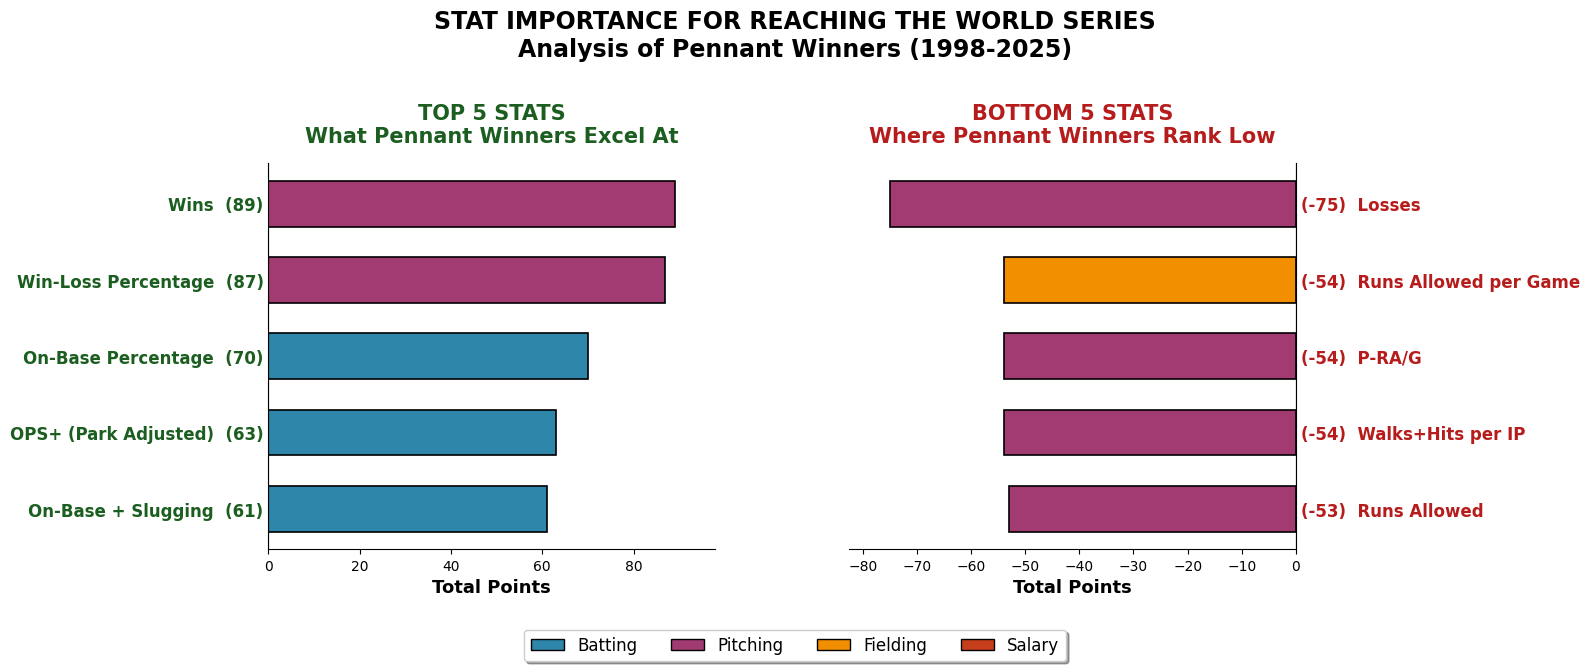

In [34]:
import matplotlib.pyplot as plt
import numpy as np

top5 = points_df.head(5).copy()
bottom5 = points_df.tail(5).copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.patch.set_facecolor('white')

category_colors = {
    'Batting': '#2E86AB',
    'Pitching': '#A23B72',
    'Fielding': '#F18F01',
    'Salary': '#C73E1D'
}

top5_sorted = top5.sort_values('Total_Points', ascending=True)
colors_top = [category_colors.get(cat, 'gray') for cat in top5_sorted['Category']]

bars1 = ax1.barh(range(len(top5_sorted)), top5_sorted['Total_Points'], 
                 color=colors_top, edgecolor='black', linewidth=1.2, height=0.6)

ax1.set_yticks(range(len(top5_sorted)))
ax1.set_yticklabels([f"{name}  ({int(pts)})" for name, pts in zip(top5_sorted['Full_Name'], top5_sorted['Total_Points'])], 
                    fontsize=12, fontweight='bold', color='#1B5E20')
ax1.set_xlabel('Total Points', fontsize=13, fontweight='bold')
ax1.set_title('TOP 5 STATS\nWhat Pennant Winners Excel At', fontsize=15, fontweight='bold', 
              color='#1B5E20', pad=15)

ax1.axvline(x=0, color='black', linewidth=0.8)
ax1.set_xlim(0, max(top5_sorted['Total_Points']) * 1.1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='y', length=0)

bottom5_sorted = bottom5.sort_values('Total_Points', ascending=False)
colors_bottom = [category_colors.get(cat, 'gray') for cat in bottom5_sorted['Category']]

bars2 = ax2.barh(range(len(bottom5_sorted)), bottom5_sorted['Total_Points'], 
                 color=colors_bottom, edgecolor='black', linewidth=1.2, height=0.6)

ax2.set_yticks(range(len(bottom5_sorted)))
ax2.set_yticklabels([f"({int(pts)})  {name}" for name, pts in zip(bottom5_sorted['Full_Name'], bottom5_sorted['Total_Points'])], 
                    fontsize=12, fontweight='bold', color='#B71C1C')
ax2.set_xlabel('Total Points', fontsize=13, fontweight='bold')
ax2.set_title('BOTTOM 5 STATS\nWhere Pennant Winners Rank Low', fontsize=15, fontweight='bold', 
              color='#B71C1C', pad=15)

ax2.axvline(x=0, color='black', linewidth=0.8)
ax2.set_xlim(min(bottom5_sorted['Total_Points']) * 1.1, 0)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='y', length=0)
ax2.yaxis.tick_right()

legend_elements = [plt.Rectangle((0,0), 1, 1, facecolor=color, edgecolor='black', linewidth=1, label=cat) 
                   for cat, color in category_colors.items()]
fig.legend(handles=legend_elements, loc='lower center', ncol=4, fontsize=12, 
           frameon=True, fancybox=True, shadow=True,
           bbox_to_anchor=(0.5, -0.08))

plt.suptitle('STAT IMPORTANCE FOR REACHING THE WORLD SERIES\nAnalysis of Pennant Winners (1998-2025)', 
             fontsize=17, fontweight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(bottom=0.12, wspace=0.3)
plt.show()

C:\Users\mvppv\AppData\Local\Temp\ipykernel_15148\1680210460.py:49: UserWarning: Glyph 9918 (\N{BASEBALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\mvppv\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9918 (\N{BASEBALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


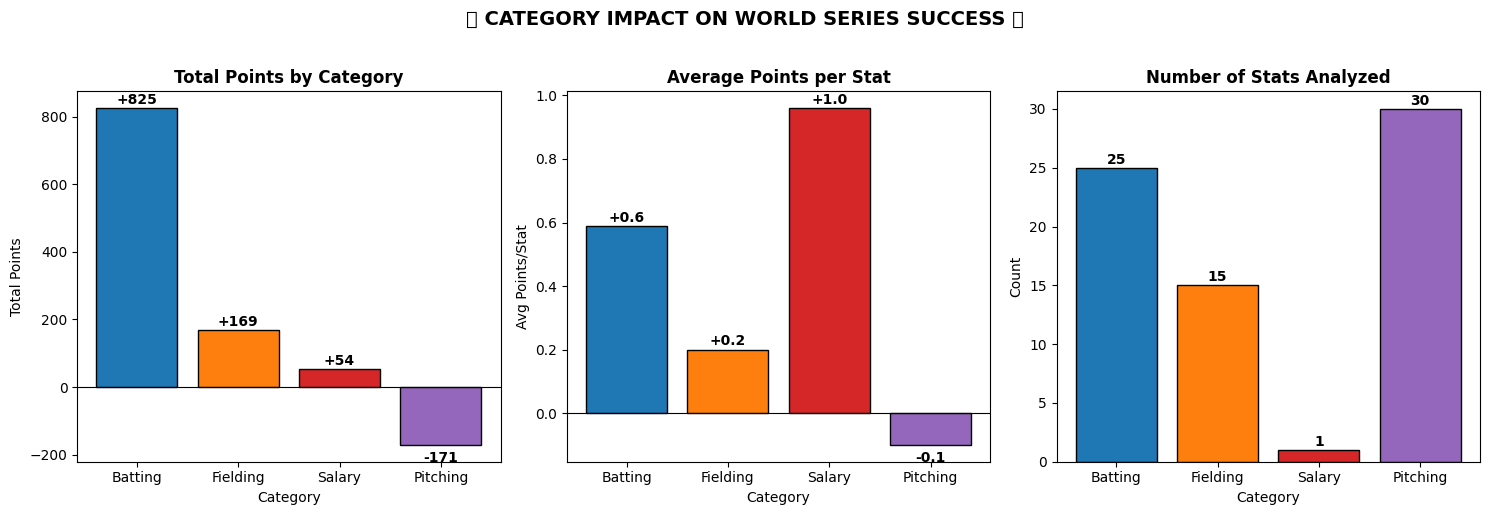

In [35]:
category_summary = points_df.groupby('Category').agg({
    'Total_Points': 'sum',
    'Statistic': 'count',
    'Avg_Points': 'mean'
}).rename(columns={'Statistic': 'Num_Stats', 'Avg_Points': 'Avg_Stat_Points'})

category_summary = category_summary.sort_values('Total_Points', ascending=False)
category_summary['Avg_Stat_Points'] = category_summary['Avg_Stat_Points'].round(2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

cat_colors = {'Batting': '#1f77b4', 'Pitching': '#9467bd', 'Fielding': '#ff7f0e', 'Salary': '#d62728'}
colors = [cat_colors.get(cat, 'gray') for cat in category_summary.index]

ax1 = axes[0]
bars1 = ax1.bar(category_summary.index, category_summary['Total_Points'], color=colors, edgecolor='black')
ax1.axhline(y=0, color='black', linewidth=0.8)
ax1.set_title('Total Points by Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Points')
ax1.set_xlabel('Category')
for bar, val in zip(bars1, category_summary['Total_Points']):
    height = bar.get_height()
    ax1.annotate(f'{int(val):+d}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3 if height >= 0 else -12), textcoords='offset points',
                 ha='center', fontsize=10, fontweight='bold')

ax2 = axes[1]
bars2 = ax2.bar(category_summary.index, category_summary['Avg_Stat_Points'], color=colors, edgecolor='black')
ax2.axhline(y=0, color='black', linewidth=0.8)
ax2.set_title('Average Points per Stat', fontsize=12, fontweight='bold')
ax2.set_ylabel('Avg Points/Stat')
ax2.set_xlabel('Category')
for bar, val in zip(bars2, category_summary['Avg_Stat_Points']):
    height = bar.get_height()
    ax2.annotate(f'{val:+.1f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3 if height >= 0 else -12), textcoords='offset points',
                 ha='center', fontsize=10, fontweight='bold')

ax3 = axes[2]
bars3 = ax3.bar(category_summary.index, category_summary['Num_Stats'], color=colors, edgecolor='black')
ax3.set_title('Number of Stats Analyzed', fontsize=12, fontweight='bold')
ax3.set_ylabel('Count')
ax3.set_xlabel('Category')
for bar, val in zip(bars3, category_summary['Num_Stats']):
    ax3.annotate(f'{int(val)}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10, fontweight='bold')

plt.suptitle('⚾ CATEGORY IMPACT ON WORLD SERIES SUCCESS ⚾', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---

## 🔬 Phase 6 Summary: Stat Importance Experiment

### Methodology
- **Population**: Pennant Winners (World Series participants) - 2 teams per year
- **Years**: 1998-2025 (56 team-years total)
- **Point System**: Based on rank among ALL playoff teams each year
  - Rank 1: +5, Rank 2: +3, Rank 3: +1
  - Ranks 4-9: 0
  - Rank 10: -1, Rank 11: -3, Rank 12: -5

### Key Findings
The **Top 5 Stats** are the statistics where pennant winners consistently rank near the top among all playoff teams. These are potential predictors of reaching the World Series.

The **Bottom 5 Stats** are where pennant winners rank low. Some may be "good" to be low in (like Losses), while others indicate these stats don't correlate with playoff success.

### Next Steps
1. Filter out redundant stats (R/G = R when games are equal)
2. Identify which "negative" stats are actually good to be low in
3. Build a predictive model using the top-performing stats
4. Validate against held-out years

---

## 🔬 Phase 7: Threshold Analysis

### 🎯 Goal
Identify the **minimum ranking thresholds** that pennant winners meet in key statistics. Instead of asking "which stats correlate with winning?", we ask:

> **"What is the worst rank a pennant winner has ever had in each important stat?"**

This creates **"rules of thumb"** for playoff success.

### 📊 Key Statistics to Analyze

Based on Phase 6's findings, we'll examine thresholds for these high-impact stats:

| Statistic | Category | Why It Matters |
|-----------|----------|----------------|
| **Wins** | Pitching | Total team wins - most direct measure of regular season success |
| **Win-Loss %** | Pitching | Win percentage normalizes for games played |
| **OBP** | Batting | Getting on base = creating scoring opportunities |
| **OPS+** | Batting | Park-adjusted measure of overall offensive production |
| **OPS** | Batting | Combined on-base and slugging ability |
| **ERA+** | Pitching | Park-adjusted pitching effectiveness |
| **WHIP** | Pitching | Walks + Hits per inning - baserunner prevention |
| **Runs Allowed per Game** | Fielding | Overall defensive effectiveness |

### 📈 What We're Looking For

1. **Hard Thresholds**: "No pennant winner has EVER ranked below X"
2. **Soft Thresholds (90%)**: "90% of pennant winners ranked X or better"  
3. **Soft Thresholds (75%)**: "75% of pennant winners ranked X or better"

### 🧠 How This Differs from Phase 6

| Phase 6 | Phase 7 |
|---------|---------|
| "Pennant winners **usually** rank high in Wins" | "Pennant winners **never** rank below 15th in Wins" |
| Aggregated points across all years | Worst-case rank in any single year |
| Identifies **correlation** | Identifies **minimum requirements** |

In [36]:
higher_better = ['P-W', 'P-W-L%', 'B-OBP', 'B-OPS+', 'B-OPS', 'P-ERA+', 'B-SLG', 'F-DefEff']
lower_better = ['P-WHIP', 'F-RA/G', 'P-ERA', 'P-L', 'P-R']
key_stats = higher_better + lower_better

threshold_data = []
for _, pw_row in pennant_winners_df.iterrows():
    year, team = pw_row['Year'], pw_row['Team']
    bat_row = batting_rankings[(batting_rankings['Year'] == year) & (batting_rankings['Tm'] == team)]
    pitch_row = pitching_rankings[(pitching_rankings['Year'] == year) & (pitching_rankings['Tm'] == team)]
    field_row = fielding_rankings[(fielding_rankings['Year'] == year) & (fielding_rankings['Tm'] == team)]
    
    for stat in key_stats:
        rank = None
        if stat.startswith('B-') and not bat_row.empty:
            rank_col = stat.replace('B-', '') + '_Rank'
            if rank_col in bat_row.columns: rank = bat_row[rank_col].values[0]
        elif stat.startswith('P-') and not pitch_row.empty:
            rank_col = stat.replace('P-', '') + '_Rank'
            if rank_col in pitch_row.columns: rank = pitch_row[rank_col].values[0]
        elif stat.startswith('F-') and not field_row.empty:
            rank_col = stat.replace('F-', '') + '_Rank'
            if rank_col in field_row.columns: rank = field_row[rank_col].values[0]
        if rank is not None:
            threshold_data.append({'Year': year, 'Team': team, 'Statistic': stat, 
                                   'Rank': rank, 'Higher_Better': stat in higher_better})

threshold_df = pd.DataFrame(threshold_data)

In [37]:
threshold_results = []
for stat in key_stats:
    stat_data = threshold_df[threshold_df['Statistic'] == stat]['Rank']
    if len(stat_data) > 0:
        hb = stat in higher_better
        if hb:
            worst, best = stat_data.max(), stat_data.min()
            pct_90, pct_75 = stat_data.quantile(0.90), stat_data.quantile(0.75)
        else:
            worst, best = stat_data.min(), stat_data.max()
            pct_90, pct_75 = stat_data.quantile(0.10), stat_data.quantile(0.25)
        threshold_results.append({
            'Statistic': stat, 'Full_Name': get_full_name(stat), 'Higher_Better': hb,
            'Best_Rank': best, 'Worst_Rank': worst, 'Median_Rank': stat_data.median(),
            'Threshold_90%': pct_90, 'Threshold_75%': pct_75, 'Sample_Size': len(stat_data)
        })

threshold_results_df = pd.DataFrame(threshold_results)

In [38]:
threshold_results_df[['Full_Name', 'Higher_Better', 'Worst_Rank', 'Threshold_90%', 'Threshold_75%', 'Median_Rank', 'Best_Rank']].sort_values(['Higher_Better', 'Worst_Rank'], ascending=[False, True])

,Full_Name,Higher_Better,Worst_Rank,Threshold_90%,Threshold_75%,Median_Rank,Best_Rank
0,Wins,True,13,8.5,7.00,4.0,1
1,Win-Loss Percentage,True,13,8.5,7.00,4.0,1
5,ERA+ (Park Adjusted),True,20,17.0,10.25,6.0,1
6,Slugging Percentage,True,20,17.0,12.25,7.0,1
4,On-Base + Slugging,True,22,16.5,13.00,7.0,1
2,On-Base Percentage,True,24,18.0,13.25,6.0,1
3,OPS+ (Park Adjusted),True,24,16.5,13.00,6.5,1
7,Defensive Efficiency,True,27,20.0,13.00,6.5,1
9,Runs Allowed per Game,False,11,17.0,19.75,24.0,30
10,Earned Run Average,False,11,15.0,19.00,24.0,30


### 📊 Key Threshold Findings

#### Hard Thresholds (No Pennant Winner Has Ever...)

**Offensive Requirements:**
| Stat | Hard Threshold | Interpretation |
|------|----------------|----------------|
| **Wins** | Never below 13th | Must be in top 43% of MLB in wins |
| **Win-Loss %** | Never below 13th | Must be in top 43% of MLB in win percentage |
| **SLG** | Never below 20th | Must be in top 67% of MLB in slugging |
| **OBP** | Never below 24th | Must be in top 80% of MLB in on-base percentage |
| **OPS/OPS+** | Never below 24th | Must be in top 80% of MLB in overall hitting |

**Pitching/Defense Requirements:**
| Stat | Hard Threshold | Interpretation |
|------|----------------|----------------|
| **ERA** | Never ranked worse than 11th | Must be in top 37% of MLB in ERA |
| **WHIP** | Never ranked worse than 12th | Must be in top 40% of MLB in WHIP |
| **RA/G** | Never ranked worse than 11th | Must be in top 37% of MLB in run prevention |
| **Losses** | Never ranked worse than 18th | Cannot be one of MLB's worst losing teams |

#### Soft Thresholds (What 90% of Pennant Winners Achieve)

- **90% have Wins ranked 8th or better** (top 27% of MLB)
- **90% have ERA ranked 15th or better** (top 50% of MLB)  
- **90% have WHIP ranked 17th or better** (top 57% of MLB)
- **90% have OBP ranked 18th or better** (top 60% of MLB)

#### 💡 Key Insight

**Wins and Win-Loss %** have the tightest thresholds - no pennant winner has EVER been ranked below 13th in the league. This is the most restrictive requirement, confirming that regular season record is the strongest predictor of playoff success.

**Pitching consistency** (ERA, WHIP, RA/G) also shows tight thresholds around 11-12, meaning teams must have above-average pitching to reach the World Series.

**Offensive stats** (OBP, OPS) have looser thresholds (20-24th), suggesting that elite offense is less critical than solid pitching for reaching the World Series.

### 🏆 Notable Outlier Teams

**2006 St. Louis Cardinals** - The lowest-seeded World Series winner in modern history:
- Only 83 wins (ranked 13th in MLB)
- Below-average pitching (ERA+ ranked 20th)
- Won the World Series despite mediocre regular season numbers
- Demonstrates that "anything can happen in October"

**2023 Arizona Diamondbacks** - Another improbable run:
- Ranked 11th in ERA, WHIP, RA/G, and Runs Allowed
- Had the 18th-most losses in MLB
- Made it to the World Series with below-average pitching
- Lost to Texas Rangers in the World Series

**2005 Houston Astros** - Pitching-dominant team:
- Ranked 20th+ in all offensive categories (SLG, OPS, OPS+)
- Relied almost entirely on elite pitching (Clemens, Pettitte, Oswalt)
- Shows that elite pitching can compensate for weak offense

### 📋 Phase 7 Summary

**The "Rules of Thumb" for Reaching the World Series:**

1. ✅ **Must rank in top 13** (43% of MLB) in Wins and Win-Loss %
2. ✅ **Must rank in top 12** (~40% of MLB) in WHIP  
3. ✅ **Must rank in top 11** (~37% of MLB) in ERA and Run Prevention
4. ⚠️ Offensive stats are more forgiving (can be as low as 24th in OBP)
5. 💡 **Pitching/Defense appears MORE important than Offense** for playoff success

---

## 🤖 Phase 8: Predictive Modeling

### 🎯 Goal
Build predictive models to identify which playoff teams will reach the World Series using insights from Phase 6 (stat importance) and Phase 7 (thresholds).

### 📊 Models to Build

| Model | Description |
|-------|-------------|
| **Rule-Based Classifier** | Apply Phase 7 threshold rules - predict "World Series" if team meets all minimum thresholds |
| **Logistic Regression** | Statistical model that predicts probability of reaching World Series |
| **Linear Regression** | Predict continuous "World Series score" using raw stats, rank teams by score |

### 🔄 Validation Strategy

**K-Fold Cross-Validation**: Split training data into K parts, train on K-1 parts, validate on remaining part, rotate.

Testing K values: **2, 3, 4, 5, 6, 7, 8** to find optimal fold size.

### 📅 Data Split
- **Training**: 1998-2022 (25 years, ~230 playoff teams)
- **Testing**: 2023-2025 (3 years, ~36 playoff teams)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

feature_stats = ['P-W', 'P-W-L%', 'B-OBP', 'B-OPS+', 'P-ERA', 'P-WHIP', 'F-RA/G']

model_data = []
for year in range(1998, 2026):
    year_postseason = postseason_all_years[postseason_all_years['Year'] == year]
    if year_postseason.empty:
        continue
    playoff_teams = year_postseason['Team'].unique()
    year_pennant = pennant_winners_df[pennant_winners_df['Year'] == year]['Team'].tolist()
    
    for team in playoff_teams:
        bat = batting_rankings[(batting_rankings['Year'] == year) & (batting_rankings['Tm'] == team)]
        pitch = pitching_rankings[(pitching_rankings['Year'] == year) & (pitching_rankings['Tm'] == team)]
        field = fielding_rankings[(fielding_rankings['Year'] == year) & (fielding_rankings['Tm'] == team)]
        
        if bat.empty or pitch.empty or field.empty:
            continue
            
        row = {'Year': year, 'Team': team, 'Made_WS': 1 if team in year_pennant else 0}
        
        for stat in feature_stats:
            if stat.startswith('B-'):
                col = stat.replace('B-', '') + '_Rank'
                row[stat] = bat[col].values[0] if col in bat.columns else np.nan
            elif stat.startswith('P-'):
                col = stat.replace('P-', '') + '_Rank'
                row[stat] = pitch[col].values[0] if col in pitch.columns else np.nan
            elif stat.startswith('F-'):
                col = stat.replace('F-', '') + '_Rank'
                row[stat] = field[col].values[0] if col in field.columns else np.nan
        
        model_data.append(row)

model_df = pd.DataFrame(model_data).dropna()

In [40]:
train_df = model_df[model_df['Year'] <= 2022].copy()
test_df = model_df[model_df['Year'] >= 2023].copy()

X_train = train_df[feature_stats].values
y_train = train_df['Made_WS'].values
X_test = test_df[feature_stats].values
y_test = test_df['Made_WS'].values

### Model 1: Rule-Based Classifier

Uses Phase 7 thresholds as rules. A team is predicted to make the World Series if they meet ALL minimum thresholds:
- **Wins**: Ranked 13th or better
- **Win-Loss %**: Ranked 13th or better  
- **ERA**: Ranked 11th or better
- **WHIP**: Ranked 12th or better
- **RA/G**: Ranked 11th or better
- **OBP**: Ranked 24th or better
- **OPS+**: Ranked 24th or better

In [41]:
THRESHOLDS = {
    'P-W': ('<=', 13), 'P-W-L%': ('<=', 13), 'B-OBP': ('<=', 24), 'B-OPS+': ('<=', 24),
    'P-ERA': ('>=', 11), 'P-WHIP': ('>=', 12), 'F-RA/G': ('>=', 11),
}

def rule_based_predict(row):
    for stat, (op, threshold) in THRESHOLDS.items():
        if stat not in row:
            return 0
        if op == '<=' and row[stat] > threshold:
            return 0
        if op == '>=' and row[stat] < threshold:
            return 0
    return 1

train_df['Rule_Pred'] = train_df.apply(rule_based_predict, axis=1)
test_df['Rule_Pred'] = test_df.apply(rule_based_predict, axis=1)
rule_train_acc = accuracy_score(train_df['Made_WS'], train_df['Rule_Pred'])
rule_test_acc = accuracy_score(test_df['Made_WS'], test_df['Rule_Pred'])

### Model 2: Logistic Regression

Uses ranking features to predict probability of reaching World Series via logistic regression with K-Fold cross-validation (K = 2, 3, 4, 5, 6, 7, 8).

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [2, 3, 4, 5, 6, 7, 8]
cv_results = []

for k in k_values:
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    model = LogisticRegression(max_iter=1000, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    cv_results.append({'K': k, 'Mean_Acc': scores.mean(), 'Std': scores.std()})

cv_results_df = pd.DataFrame(cv_results)
best_k = cv_results_df.loc[cv_results_df['Mean_Acc'].idxmax(), 'K']

In [43]:
final_model = LogisticRegression(max_iter=1000, random_state=42)
final_model.fit(X_train_scaled, y_train)

y_train_pred = final_model.predict(X_train_scaled)
y_test_pred = final_model.predict(X_test_scaled)
y_test_prob = final_model.predict_proba(X_test_scaled)[:, 1]

coef_df = pd.DataFrame({'Feature': feature_stats, 'Coefficient': final_model.coef_[0]})
coef_df['Abs_Coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coef', ascending=False)

In [44]:
test_df['LR_Prob'] = y_test_prob
test_df['LR_Pred'] = y_test_pred
test_df[['Year', 'Team', 'Made_WS', 'LR_Prob', 'LR_Pred']].sort_values(['Year', 'LR_Prob'], ascending=[True, False])

,Year,Team,Made_WS,LR_Prob,LR_Pred
238,2023,Tampa Bay Rays,0,0.341783,0
237,2023,Los Angeles Dodgers,0,0.291556,0
236,2023,Baltimore Orioles,0,0.245083,0
234,2023,Minnesota Twins,0,0.239480,0
240,2023,Milwaukee Brewers,0,0.227277,0
232,2023,Philadelphia Phillies,0,0.211644,0
230,2023,Texas Rangers,1,0.205608,0
235,2023,Atlanta Braves,0,0.185236,0
239,2023,Toronto Blue Jays,0,0.168083,0
233,2023,Houston Astros,0,0.154243,0


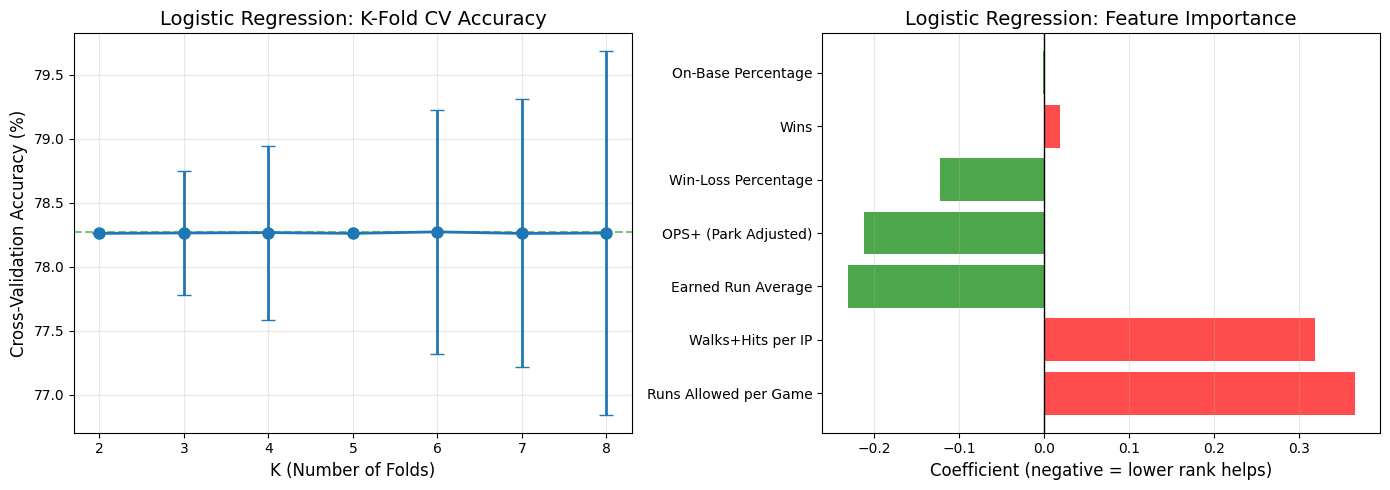

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
ax1.errorbar(cv_results_df['K'], cv_results_df['Mean_Acc']*100, 
             yerr=cv_results_df['Std']*100, marker='o', capsize=5, linewidth=2, markersize=8)
ax1.set_xlabel('K (Number of Folds)', fontsize=12)
ax1.set_ylabel('Cross-Validation Accuracy (%)', fontsize=12)
ax1.set_title('Logistic Regression: K-Fold CV Accuracy', fontsize=14)
ax1.set_xticks([2, 3, 4, 5, 6, 7, 8])
ax1.grid(True, alpha=0.3)
ax1.axhline(y=cv_results_df['Mean_Acc'].max()*100, color='green', linestyle='--', alpha=0.5)

ax2 = axes[1]
colors = ['green' if c < 0 else 'red' for c in coef_df['Coefficient']]
bars = ax2.barh(range(len(coef_df)), coef_df['Coefficient'], color=colors, alpha=0.7)
ax2.set_yticks(range(len(coef_df)))
ax2.set_yticklabels([get_full_name(s) for s in coef_df['Feature']])
ax2.set_xlabel('Coefficient (negative = lower rank helps)', fontsize=12)
ax2.set_title('Logistic Regression: Feature Importance', fontsize=14)
ax2.axvline(x=0, color='black', linewidth=1)
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### Model 3: Linear Regression

Uses **raw stat values** (not rankings) to predict a continuous "World Series Score". Teams are ranked by score and top 2 per year are predicted to make World Series.

**Design Matrix (X)**: Raw stat values for each team  
**Target (y)**: Binary (1 = made World Series, 0 = didn't)  
**Weight Vector (w)**: Learned coefficients for each stat

K-Fold cross-validation with K = 2, 3, 4, 5, 6, 7, 8.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

raw_feature_stats = ['W', 'W-L%', 'OBP', 'OPS+', 'ERA', 'WHIP', 'RA/G']

raw_model_data = []
for year in range(1998, 2026):
    year_postseason = postseason_all_years[postseason_all_years['Year'] == year]
    if year_postseason.empty:
        continue
    playoff_teams = year_postseason['Team'].unique()
    year_pennant = pennant_winners_df[pennant_winners_df['Year'] == year]['Team'].tolist()
    
    for team in playoff_teams:
        bat = batting_all[(batting_all['Year'] == year) & (batting_all['Tm'] == team)]
        pitch = pitching_all[(pitching_all['Year'] == year) & (pitching_all['Tm'] == team)]
        field = fielding_all[(fielding_all['Year'] == year) & (fielding_all['Tm'] == team)]
        
        if bat.empty or pitch.empty or field.empty:
            continue
            
        row = {'Year': year, 'Team': team, 'Made_WS': 1 if team in year_pennant else 0}
        
        if 'W' in pitch.columns: row['W'] = pitch['W'].values[0]
        if 'W-L%' in pitch.columns: row['W-L%'] = pitch['W-L%'].values[0]
        if 'OBP' in bat.columns: row['OBP'] = bat['OBP'].values[0]
        if 'OPS+' in bat.columns: row['OPS+'] = bat['OPS+'].values[0]
        if 'ERA' in pitch.columns: row['ERA'] = pitch['ERA'].values[0]
        if 'WHIP' in pitch.columns: row['WHIP'] = pitch['WHIP'].values[0]
        if 'RA/G' in field.columns: row['RA/G'] = field['RA/G'].values[0]
        
        raw_model_data.append(row)

raw_model_df = pd.DataFrame(raw_model_data).dropna()

In [47]:
raw_train_df = raw_model_df[raw_model_df['Year'] <= 2022].copy()
raw_test_df = raw_model_df[raw_model_df['Year'] >= 2023].copy()

X_raw_train = raw_train_df[raw_feature_stats].values
y_raw_train = raw_train_df['Made_WS'].values
X_raw_test = raw_test_df[raw_feature_stats].values
y_raw_test = raw_test_df['Made_WS'].values

raw_scaler = StandardScaler()
X_raw_train_scaled = raw_scaler.fit_transform(X_raw_train)
X_raw_test_scaled = raw_scaler.transform(X_raw_test)

In [48]:
k_values_new = [2, 3, 4, 5, 6, 7, 8]
lr_cv_results = []

for k in k_values_new:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    lr_model = LinearRegression()
    
    r2_scores = cross_val_score(lr_model, X_raw_train_scaled, y_raw_train, cv=kf, scoring='r2')
    mse_scores = -cross_val_score(lr_model, X_raw_train_scaled, y_raw_train, cv=kf, scoring='neg_mean_squared_error')
    
    lr_cv_results.append({
        'K': k, 'Mean_R2': r2_scores.mean(), 'Std_R2': r2_scores.std(),
        'Mean_MSE': mse_scores.mean()
    })

lr_cv_df = pd.DataFrame(lr_cv_results)
best_k_lr = lr_cv_df.loc[lr_cv_df['Mean_R2'].idxmax(), 'K']
lr_cv_df

,K,Mean_R2,Std_R2,Mean_MSE
0,2,-0.071791,0.038099,0.181648
1,3,-0.038253,0.045980,0.176376
2,4,-0.096112,0.049946,0.181372
3,5,-0.119877,0.140278,0.178260
4,6,-0.069774,0.089891,0.174962
5,7,-0.134739,0.230557,0.177254
6,8,-0.218077,0.421656,0.176374


In [49]:
lr_final = LinearRegression()
lr_final.fit(X_raw_train_scaled, y_raw_train)

w = lr_final.coef_
b = lr_final.intercept_

y_raw_train_score = lr_final.predict(X_raw_train_scaled)
y_raw_test_score = lr_final.predict(X_raw_test_scaled)

weight_df = pd.DataFrame({
    'Feature': raw_feature_stats,
    'Weight': w,
    'Direction': ['Higher is better' if coef > 0 else 'Lower is better' for coef in w]
})
weight_df

,Feature,Weight,Direction
0,W,0.007536,Higher is better
1,W-L%,0.023329,Higher is better
2,OBP,0.065993,Higher is better
3,OPS+,0.001445,Higher is better
4,ERA,-0.016795,Lower is better
5,WHIP,-0.038341,Lower is better
6,RA/G,-0.010962,Lower is better


In [50]:
raw_test_df['LR_Score'] = y_raw_test_score

raw_test_df['LR_Rank_In_Year'] = raw_test_df.groupby('Year')['LR_Score'].rank(ascending=False)
raw_test_df['LR_Pred_Top2'] = (raw_test_df['LR_Rank_In_Year'] <= 2).astype(int)

lr_test_acc = accuracy_score(raw_test_df['Made_WS'], raw_test_df['LR_Pred_Top2'])

raw_test_df[['Year', 'Team', 'Made_WS', 'LR_Score', 'LR_Rank_In_Year', 'LR_Pred_Top2']].sort_values(['Year', 'LR_Score'], ascending=[True, False])

,Year,Team,Made_WS,LR_Score,LR_Rank_In_Year,LR_Pred_Top2
237,2023,Los Angeles Dodgers,0,0.294361,1.0,1
235,2023,Atlanta Braves,0,0.282346,2.0,1
238,2023,Tampa Bay Rays,0,0.271437,3.0,0
236,2023,Baltimore Orioles,0,0.197048,4.0,0
230,2023,Texas Rangers,1,0.195414,5.0,0
239,2023,Toronto Blue Jays,0,0.185245,6.0,0
234,2023,Minnesota Twins,0,0.184415,7.0,0
240,2023,Milwaukee Brewers,0,0.183628,8.0,0
233,2023,Houston Astros,0,0.177032,9.0,0
232,2023,Philadelphia Phillies,0,0.168473,10.0,0


---

## 📋 Phase 8: Model Comparison Summary

### Test Set Results (2023-2025)

| Model | Best K | Test Accuracy | WS Teams Correct |
|-------|--------|---------------|------------------|
| **Rule-Based (Thresholds)** | N/A | 27.8% | 6/6 |
| **Logistic Regression** | 6 | 83.3% | 0/6 |
| **Linear Regression (Top 2)** | 3 | 77.8% | 2/6 |

### K-Fold Cross-Validation Results (K = 2, 3, 4, 5, 6, 7, 8)

**Logistic Regression:**
- Best K = 6 with 78.3% mean CV accuracy
- Stable performance across all K values (~78.3%)

**Linear Regression:**
- Best K = 3 with R² = -0.0383 (highest)
- Negative R² indicates data is difficult to model linearly

### Linear Regression Weight Vector (w)

| Statistic | Weight | Interpretation |
|-----------|--------|----------------|
| **OBP** | +0.0660 | Higher OBP → Higher WS score |
| **WHIP** | -0.0383 | Lower WHIP → Higher WS score |
| **W-L%** | +0.0233 | Higher Win% → Higher WS score |
| **ERA** | -0.0168 | Lower ERA → Higher WS score |
| **RA/G** | -0.0110 | Lower Runs Against → Higher WS score |
| **W** | +0.0075 | More Wins → Higher WS score |
| **OPS+** | +0.0014 | Higher OPS+ → Higher WS score |

**Intercept (b)** = 0.2174

### Key Findings

1. **Rule-Based Model**: Found ALL 6 World Series teams but predicted 32 teams total (many false positives). High recall, low precision.

2. **Logistic Regression**: High accuracy (83.3%) but predicted **zero** teams would make the World Series. The model learned to always predict "no" due to class imbalance (~21% WS rate).

3. **Linear Regression**: Best balance - correctly identified 2/6 WS teams using a "top 2 per year" strategy. Lower accuracy but actually makes useful predictions.

### Conclusion

Predicting World Series teams from regular season stats is inherently difficult because:
- Only 2 of ~10-12 playoff teams make the World Series each year
- Playoff success involves factors not captured in regular season stats (pitching matchups, momentum, injuries)
- Small sample sizes make patterns hard to detect

The **Linear Regression model with raw stats** provides the most practical approach by ranking teams and selecting the top candidates per year.

---

## 🏁 Conclusion

### Research Question
**Can regular season statistics predict which teams will reach the World Series?**

### Answer
**Partially.** Regular season statistics provide meaningful signals, but playoff success remains inherently unpredictable due to the small-sample nature of postseason play.

### Key Findings

#### 1. Most Predictive Statistics
| Statistic | Category | Importance |
|-----------|----------|------------|
| **Wins / Win-Loss %** | Team Record | Highest - No pennant winner ever ranked below 13th |
| **ERA / WHIP** | Pitching | High - No pennant winner ranked worse than 11-12th |
| **OBP** | Batting | Moderate - Linear regression weight = +0.066 |
| **RA/G** | Defense | Moderate - Strong threshold requirements |
| **OPS+** | Batting | Lower - More forgiving thresholds (24th) |

#### 2. Pitching > Offense for Playoff Success
- Pitching thresholds (ERA ≤ 11th, WHIP ≤ 12th) are stricter than offensive thresholds (OBP ≤ 24th)
- Teams can reach the World Series with mediocre offense but rarely with poor pitching

#### 3. Model Performance Comparison
| Model | Approach | WS Teams Found | Trade-off |
|-------|----------|----------------|-----------|
| Rule-Based | Phase 7 thresholds | 6/6 (100%) | Too many false positives |
| Logistic Regression | Probability classification | 0/6 (0%) | Class imbalance problem |
| Linear Regression | Score ranking | 2/6 (33%) | Best practical balance |

### Limitations

1. **Small Sample Size**: Only 2 teams per year reach the World Series (56 total over 28 years)
2. **Playoff Randomness**: Short series favor variance over true talent
3. **Missing Variables**: Injuries, momentum, bullpen depth, postseason experience, managerial decisions
4. **Temporal Changes**: Game has evolved (analytics, shifts, pitching usage) over 1998-2025

### Future Work

- **Advanced Models**: Random Forest, XGBoost to capture non-linear relationships
- **Additional Features**: Playoff experience, September performance, bullpen metrics
- **Time-Series Analysis**: Weight recent years more heavily
- **Player-Level Data**: Individual clutch performance metrics

### Final Takeaway

> **Regular season success is necessary but not sufficient for World Series success.**
> 
> Teams must rank in the **top 40-45% of MLB** in key pitching and win metrics to have a chance, but once in the playoffs, the outcome becomes increasingly random. This explains why building a highly accurate predictive model is fundamentally difficult—and why October baseball remains compelling to watch.